In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Biblioteca para converter string em número para que o sklearn consiga usar

In [2]:
data = pd.DataFrame({
    "pH": [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 8.0, 2.0, 7.5, 4.5, 6.0, 1.5, 7.0, 2.8],
    "Concentração": [
        "Concentrada", "Diluída", "Concentrada", "Diluída", 
        "Concentrada", "Diluída", "Concentrada", "Diluída", 
        "Concentrada", "Diluída", "Concentrada", "Diluída", 
        "Concentrada", "Diluída", "Diluída"
    ],
    "Cheiro": [
        "Com Cheiro", "Sem Cheiro", "Com Cheiro", "Sem Cheiro", 
        "Com Cheiro", "Sem Cheiro", "Com Cheiro", "Sem Cheiro", 
        "Com Cheiro", "Sem Cheiro", "Com Cheiro", "Sem Cheiro", 
        "Com Cheiro", "Sem Cheiro", "Com Cheiro"
    ],
    "Classe": [
        "Ácida", "Básica", "Ácida", "Básica", "Ácida", "Básica", 
        "Ácida", "Básica", "Ácida", "Básica", "Ácida", "Básica", 
        "Ácida", "Básica", "Ácida"
    ]
})

In [3]:

# Converte Concentração e Cheiro em valores numérios de 0 e 1
le_precisao = LabelEncoder()
le_classificacao = LabelEncoder()

data['Concentração'] = le_precisao.fit_transform(data['Concentração'])
data['Cheiro'] = le_classificacao.fit_transform(data['Cheiro'])

print('Como ficou "concentração":\n', data['Concentração'])
print('Como ficou "Cheiro":\n', data['Cheiro'])

Como ficou "concentração":
 0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    1
Name: Concentração, dtype: int32
Como ficou "Cheiro":
 0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
Name: Cheiro, dtype: int32


In [4]:
# Separando as caracteristicas e o rótulo
x = data[["pH", "Concentração", "Cheiro"]]

y = data["Classe"]

In [5]:
# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)


Treinando o modelo SVM

In [6]:
model = SVC(kernel='linear') # Crio o modelo SVC
model.fit(x_train, y_train) # Treino o modelo

SVC(kernel='linear')

Fazendo predições

In [7]:
y_pred = model.predict(x_test)


Avaliando as métricas do algoritmo de Machine Learning

In [8]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

1.0


In [9]:
# Classification_repot exibe um resumo das métricas
classi_re = classification_report(y_pred, y_test)
print(classi_re)

              precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         4
       Ácida       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [10]:
cm = confusion_matrix(y_pred,y_test)

Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

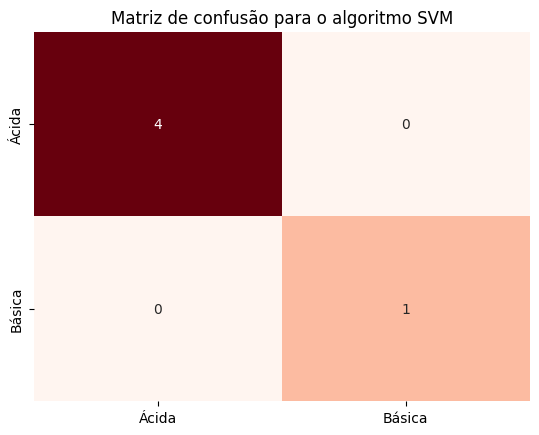

In [11]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Ácida', 'Básica'],
            yticklabels=['Ácida', 'Básica'])
plt.title('Matriz de confusão para o algoritmo SVM')

Visualização dos dados da máquina de forma gráfica

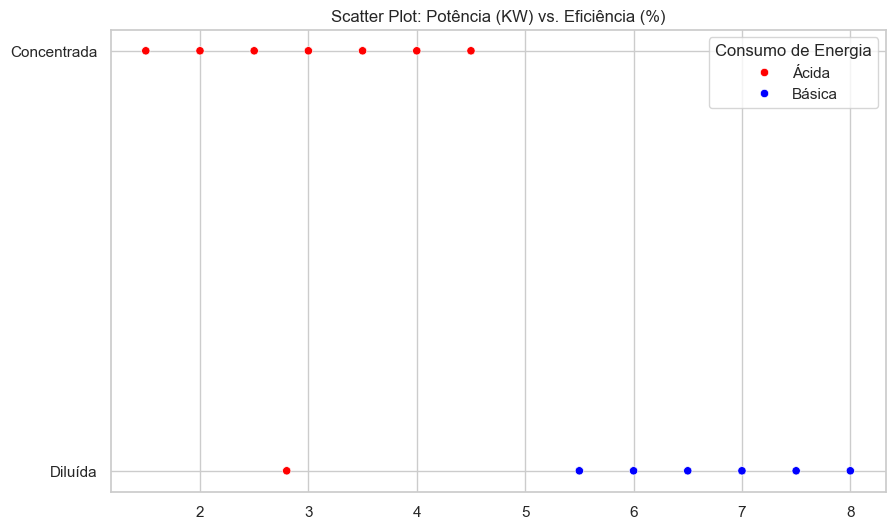

In [12]:
# Convertendo Concentração e Cheiro em valores categóricos novamente
mapping_concentracao = dict(zip(le_precisao.transform(le_precisao.classes_), le_precisao.classes_))
mapping_cheiro = dict(zip(le_classificacao.transform(le_classificacao.classes_), le_classificacao.classes_))

data['Concentração'] = data['Concentração'].map(mapping_concentracao)
data['Cheiro'] = data['Cheiro'].map(mapping_cheiro)


sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Ácida": "red", "Básica": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='Concentração', hue='Classe', data=data, palette=palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência (KW) vs. Eficiência (%)')
plt.xlabel('')
plt.ylabel('')

# Mostrando o gráfico
plt.legend(title='Consumo de Energia')
plt.show()